In [44]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
import math
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Bitcoin Time Series Prediction
The goal of this project is to develop various models to predict the future price of bitcoin. The data set consists of the open and close prices of bitcoin from january 2012 to march 2019, gathered from Coinbase.

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. If you don't know what Bitcoin is , then get some knowledge about Bitcoin https://www.coindesk.com/information/what-is-bitcoin .

In [3]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s')

In [6]:
df.set_index('date', inplace=True)

In [7]:
df.drop('Timestamp',axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099760 entries, 2014-12-01 05:33:00 to 2019-01-07 22:06:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 128.2 MB


In [9]:
df.index

DatetimeIndex(['2014-12-01 05:33:00', '2014-12-01 05:34:00',
               '2014-12-01 05:35:00', '2014-12-01 05:36:00',
               '2014-12-01 05:37:00', '2014-12-01 05:38:00',
               '2014-12-01 05:39:00', '2014-12-01 05:40:00',
               '2014-12-01 05:41:00', '2014-12-01 05:42:00',
               ...
               '2019-01-07 21:57:00', '2019-01-07 21:58:00',
               '2019-01-07 21:59:00', '2019-01-07 22:00:00',
               '2019-01-07 22:01:00', '2019-01-07 22:02:00',
               '2019-01-07 22:03:00', '2019-01-07 22:04:00',
               '2019-01-07 22:05:00', '2019-01-07 22:06:00'],
              dtype='datetime64[ns]', name='date', length=2099760, freq=None)

In [10]:
df = df.resample(rule='D').mean()

In [11]:
df.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10',
               ...
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01',
               '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', name='date', length=1499, freq='D')

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1465 entries, 2014-12-01 to 2019-01-07
Data columns (total 7 columns):
Open                 1465 non-null float64
High                 1465 non-null float64
Low                  1465 non-null float64
Close                1465 non-null float64
Volume_(BTC)         1465 non-null float64
Volume_(Currency)    1465 non-null float64
Weighted_Price       1465 non-null float64
dtypes: float64(7)
memory usage: 91.6 KB


In [14]:
#Dropped the missing values since most of them were in the early stages of bitcoin trading, 
#whenre technical outtages were common or trading volume was virtually non existant

In [15]:
#Frequency is set for daily periods, which will be the window of time for each data point in the analysis

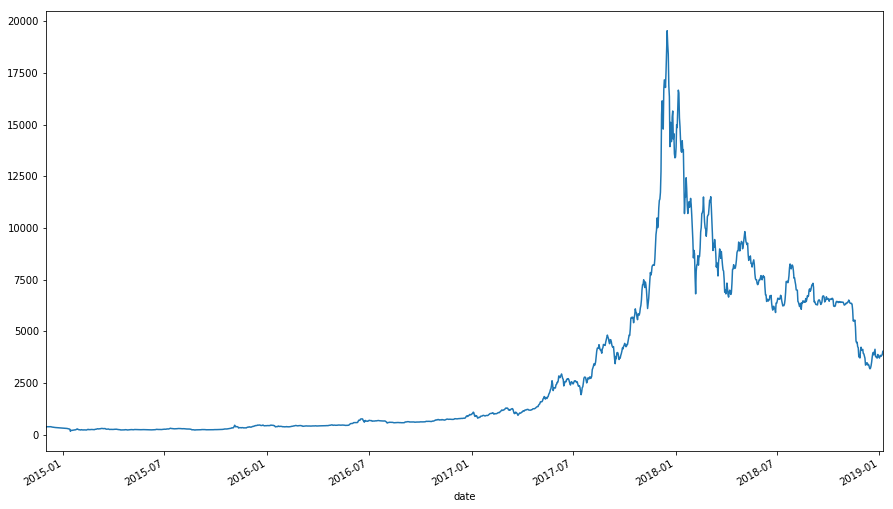

In [16]:
df['Close'].plot(figsize=(15,9)).autoscale(axis='x',tight=True)

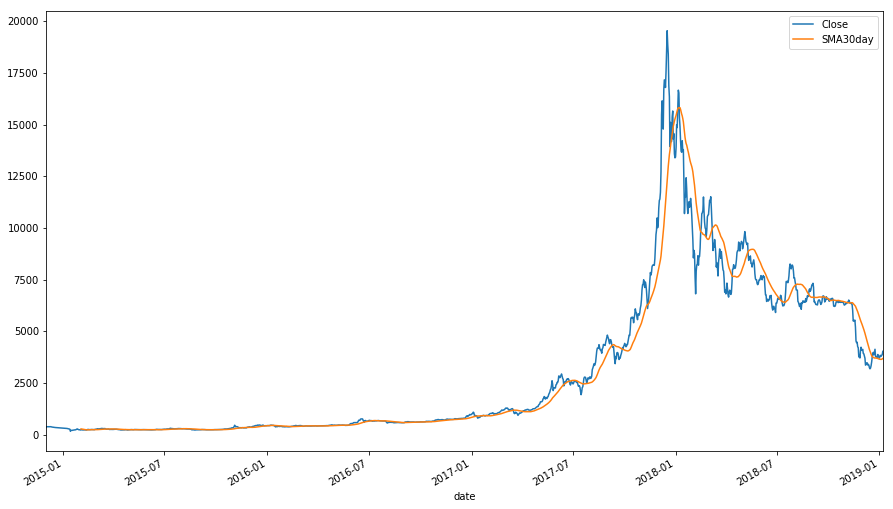

In [17]:
# Simple Moving Average
df['SMA30day'] = df['Close'].rolling(window=30).mean()
df[['Close','SMA30day']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

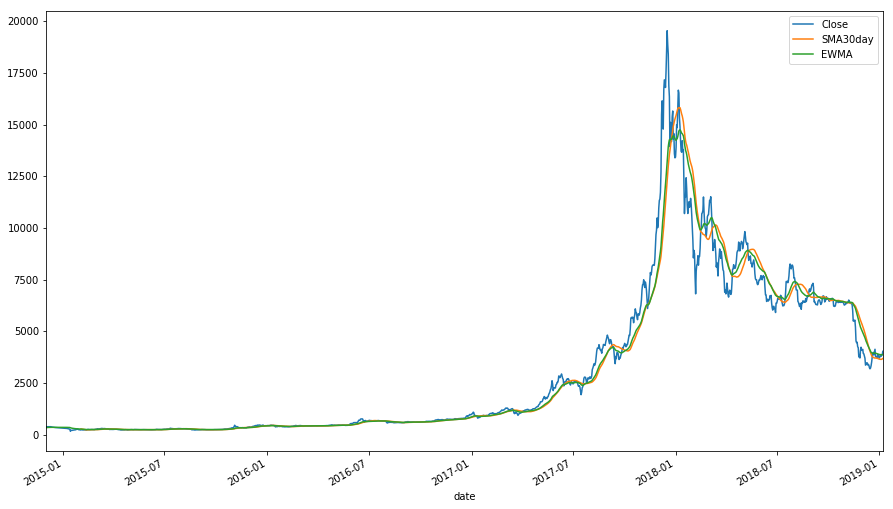

In [18]:
# Exponentially Weighted Moving Average
df['EWMA'] = df['Close'].ewm(span=30, adjust=False).mean()
df[['Close','SMA30day','EWMA']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

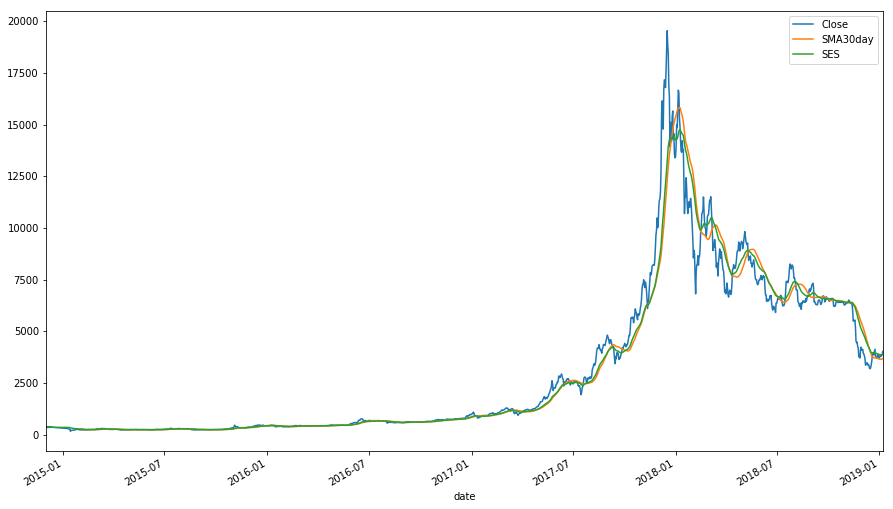

In [19]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['SES'] = SimpleExpSmoothing(df['Close']).fit(smoothing_level=2/(30+1),optimized=False).fittedvalues.shift(-1)
df[['Close','SMA30day','SES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [20]:
# Simple exponential smoothing and Exponential weighted moving average resulted in the same fitting as they overlap 
# each other perfectly. Simple moving average was the worst fit since it seems to follow a more general trend, which
# makes sense since its the mean of the time series. 

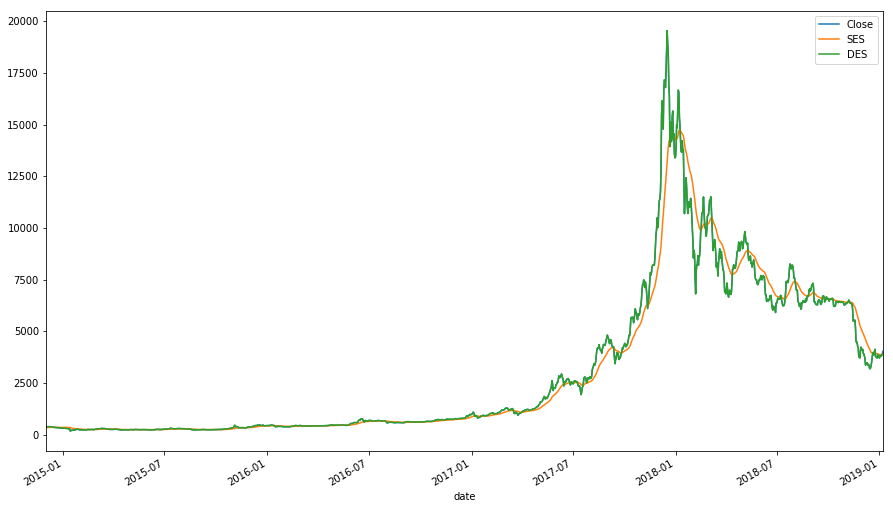

In [21]:
# Double Exponential Smoothing --> add Beta which addresses trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DES'] = ExponentialSmoothing(df['Close'], trend='add').fit().fittedvalues.shift(-1)
df[['Close','SES','DES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

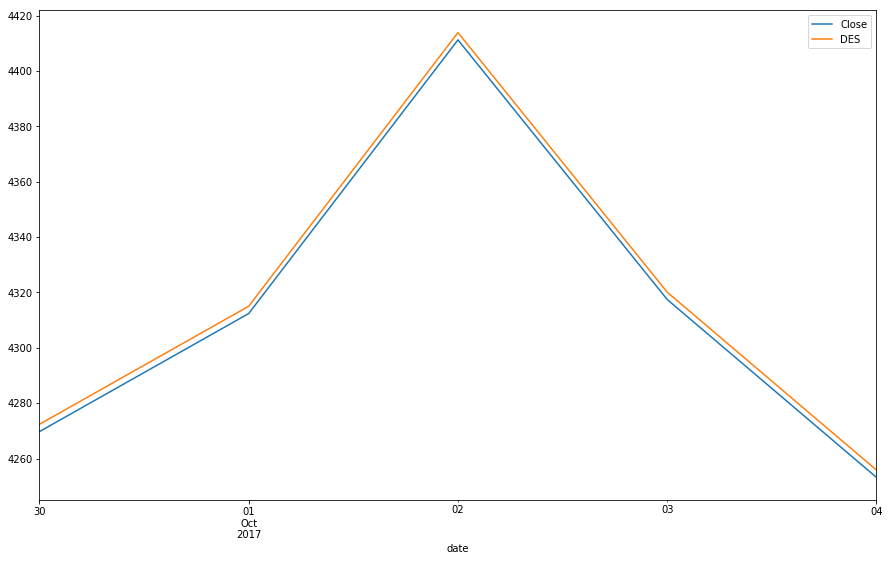

In [22]:
df[['Close','DES']][1000:1005].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [148]:
# Double Exponential Smoothing has a very close fit to the actual time series, just slightly above when zoomed in close

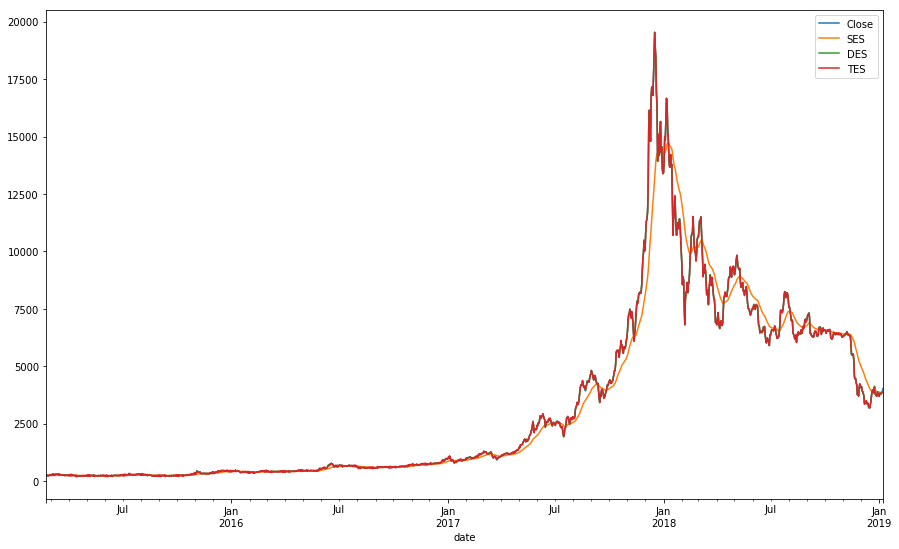

In [141]:
# Triple Exponential Smoothing --> add Gamma which addresses seasonality
df['TES'] = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=30).fit().fittedvalues.shift(-1)
df[['Close','SES','DES','TES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

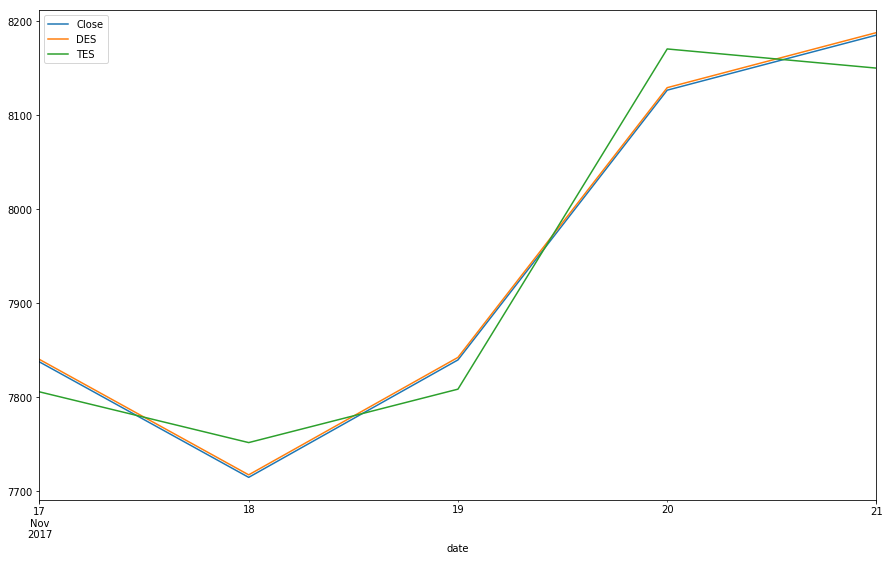

In [142]:
df[['Close','DES','TES']][1000:1005].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [173]:
# It seems like Triple Exponential Smoothing did a worse job fitting into the time series, but I suspect its because
# it will be a better predictor with the addition of gamma.

# Modeling
The goal now is to use Exponential Smoothing, ARIMA and Keras to model the data and create predictions for the future. Models will be scored on MSE and RMSE to decide what model has the least errors and is more accurate in its predictions. 

When it comes to the train test split, the break for the test set will be starting in 2018, going into 2019. So that will be about a year and 3 months worth of data, which will allow the model to predict by that same amount of time into the future.

In [23]:
df.iloc[1336]

Open                  7104.848236
High                  7105.695451
Low                   7104.110521
Close                 7104.966757
Volume_(BTC)             4.300555
Volume_(Currency)    30729.231052
Weighted_Price        7104.910531
SMA30day              6642.326358
EWMA                  6788.040807
SES                   6788.040807
DES                   7107.607210
Name: 2018-09-01 00:00:00, dtype: float64

In [24]:
#Split at location 25778 which refers to 01/01/2018 at 12 am
train = df['Close'][:1336]
test = df['Close'][1336:]

In [25]:
# Double exponential smoothing modelling, since I can't tell if there is a seasonality factor, but there is kind of
# a growth trend if you ignore the mania of 2018
fitted_DES_model = ExponentialSmoothing(train, trend='add').fit()
fitted_DES_predictions = fitted_DES_model.forecast(129)
fitted_DES_predictions.index = test.index

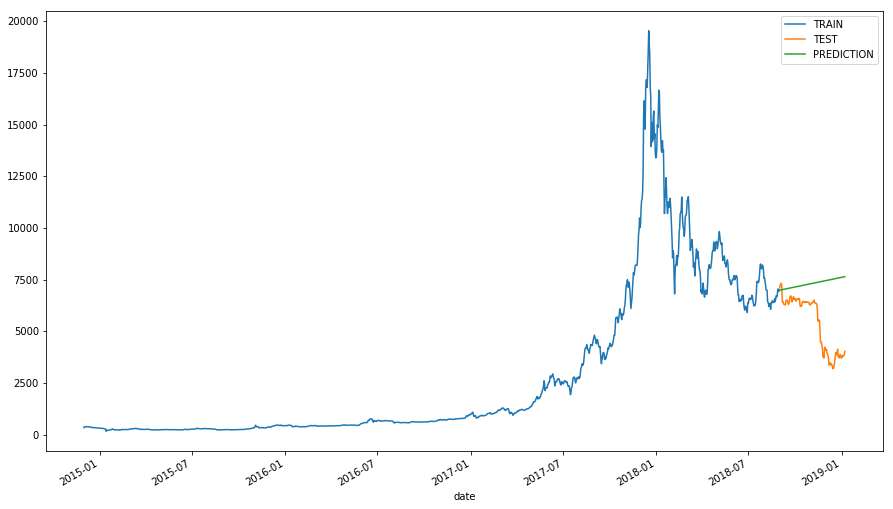

In [26]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(15,9))
fitted_DES_predictions.plot(legend=True,label='PREDICTION');

In [27]:
fitted_DES_error = rmse(test, fitted_DES_predictions)
print(fitted_DES_error)

2402.73190321933


In [218]:
# The prediction returned by the double exponential smoothing model is of a continuation of the bull market of 17-18.
# Given the break between the train and test data, the prediction basically followed the trend present in the previous 
# periods, which was clearly bullish. Seems like this model is too simplistic for a time series as volatile as this one.

# Stationarity

In [184]:
# When it comes to seasonality, It's pretty hard to tell if there is visually since the chart is so volatile, but since its
# an important input for the models we are about to implement, the augmented dickey fuller test will help clarify this issue.

In [28]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")

    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [29]:
adf_test(df['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.804238
p-value                    0.378360
# lags used               24.000000
# observations          1440.000000
critical value (1%)       -3.434899
critical value (5%)       -2.863549
critical value (10%)      -2.567840
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [16]:
# With a p value greater than 0.05, the ADF test classifies this time series as non stationary. In order to model with 
# ARIMA the series has to be stationary, which is accomplished with diferencing. 

# Determining p,q,d

In [30]:
from pmdarima import auto_arima

In [31]:
stepwise_fit = auto_arima(df['Close'], start_p=0, start_q=0, max_p=10, max_q=10, m=1,
                         seasonal=False, d=None, trace=True, error_action='ignore',
                         suppress_warnings=True, stepwise=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=20064.280, BIC=20074.858, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0); AIC=20008.875, BIC=20024.742, Fit time=0.056 seconds
Fit ARIMA: order=(0, 1, 1); AIC=20014.174, BIC=20030.041, Fit time=0.039 seconds
Fit ARIMA: order=(2, 1, 0); AIC=20010.170, BIC=20031.325, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=20010.409, BIC=20031.564, Fit time=0.121 seconds
Fit ARIMA: order=(2, 1, 1); AIC=19990.197, BIC=20016.641, Fit time=0.348 seconds
Fit ARIMA: order=(3, 1, 1); AIC=19989.999, BIC=20021.733, Fit time=0.348 seconds
Fit ARIMA: order=(3, 1, 0); AIC=20007.854, BIC=20034.299, Fit time=0.066 seconds
Fit ARIMA: order=(3, 1, 2); AIC=19984.074, BIC=20021.097, Fit time=0.831 seconds
Fit ARIMA: order=(4, 1, 3); AIC=19981.746, BIC=20029.347, Fit time=1.094 seconds
Fit ARIMA: order=(3, 1, 3); AIC=19991.997, BIC=20034.308, Fit time=0.765 seconds
Fit ARIMA: order=(5, 1, 3); AIC=19970.344, BIC=20023.234, Fit time=1.802 seconds
Fit ARIMA: order=(5, 1, 2); 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1464
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9975.172
Method:                       css-mle   S.D. of innovations            220.093
Date:                Mon, 15 Apr 2019   AIC                          19970.344
Time:                        15:12:01   BIC                          20023.234
Sample:                             1   HQIC                         19990.071
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4719      7.109      0.207      0.836     -12.462      15.406
ar.L1.D.y      0.7258      0.050     14.381      0.000       0.627       0.825
ar.L2.D.y      0.1438      0.074      1.952      0.051      -0.001       0.288
ar.L3.D.y     -0.9508      0.046    -20.593      0.000      -1.041      -0.860
ar.L4.D.y      0.2573      0.032      7.919      0.000       0.194       0.321
ar.L5.D.y     -0.0691      0.028     -2.462      0.014      -0.124      -0.014
ma.L1.D.y     -0.5312      0.044    -12.027      0.000      -0.618      -0.445
ma.L2.D.y     -0.2307      0.062     -3.729      0.000      -0.352      -0.109
ma.L3.D.y      0.8657      0.044     19.561      0.000       0.779       0.952
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0728           -0.0000j            1.0728           -0.5000
AR.2            0.7261           -0.7137j            1.0182           -0.1236
AR.3            0.7261           +0.7137j            1.0182            0.1236
AR.4            1.6709           -3.1960j            3.6064           -0.1733
AR.5            1.6709           +3.1960j            3.6064            0.1733
MA.1            0.7067           -0.7127j            1.0036           -0.1257
MA.2            0.7067           +0.7127j            1.0036            0.1257
MA.3           -1.1468           -0.0000j            1.1468           -0.5000
-----------------------------------------------------------------------------
"""

In [17]:
# Using auto_arima to determine the ARIMA orders, the algorythm came up with 5,1,3 values for p,q,d. This is the best
# way to calculate these values, but I will explore the manual ways up next

In [32]:
from statsmodels.tsa.statespace.tools import diff
df['Diff1'] = diff(df['Close'], k_diff=1)
adf_test(df['Diff1'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.819156e+00
p-value                 2.022711e-09
# lags used             2.300000e+01
# observations          1.440000e+03
critical value (1%)    -3.434899e+00
critical value (5%)    -2.863549e+00
critical value (10%)   -2.567840e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [33]:
# This confirms the resulting time series is stationary

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

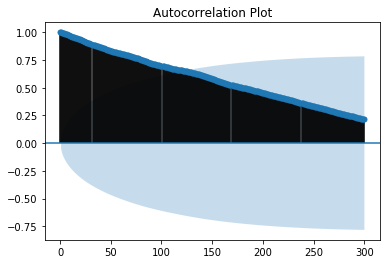

In [35]:
plot_acf(df['Close'], title='Autocorrelation Plot', lags=300);

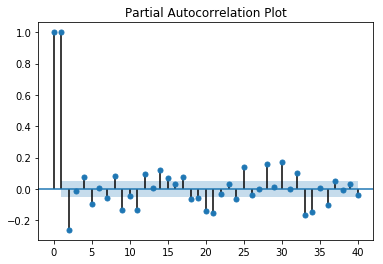

In [36]:
plot_pacf(df['Close'], title='Partial Autocorrelation Plot', lags=40);

In [33]:
# The graph indicate that the AR component is more important than MA

# ARIMA Modeling

In [37]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [38]:
ARIMA_model = ARIMA(train, order=(5,1,3))
ARIMA_results = ARIMA_model.fit()
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1335
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9130.431
Method:                       css-mle   S.D. of innovations            225.817
Date:                Mon, 15 Apr 2019   AIC                          18280.862
Time:                        15:13:03   BIC                          18332.829
Sample:                             1   HQIC                         18300.334
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9728      7.621      0.653      0.514      -9.964      19.910
ar.L1.D.Close     0.7233      0.053     13.718      0.000       0.620       0.827
ar.L2.D.Close     0.1457      0.077      1.898      0.058      -0.005       0.296
ar.L3.D.Close    -0.9474      0.047    -19.955      0.000      -1.040      -0.854
ar.L4.D.Close     0.2579      0.034      7.534      0.000       0.191       0.325
ar.L5.D.Close    -0.0728      0.030     -2.462      0.014      -0.131      -0.015
ma.L1.D.Close    -0.5297      0.046    -11.495      0.000      -0.620      -0.439
ma.L2.D.Close    -0.2323      0.065     -3.599      0.000      -0.359      -0.106
ma.L3.D.Close     0.8635      0.046     18.750      0.000       0.773       0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0714           -0.0000j            1.0714           -0.5000
AR.2            0.7290           -0.7140j            1.0204           -0.1233
AR.3            0.7290           +0.7140j            1.0204            0.1233
AR.4            1.5783           -3.1343j            3.5092           -0.1758
AR.5            1.5783           +3.1343j            3.5092            0.1758
MA.1            0.7078           -0.7133j            1.0049           -0.1256
MA.2            0.7078           +0.7133j            1.0049            0.1256
MA.3           -1.1467           -0.0000j            1.1467           -0.5000
-----------------------------------------------------------------------------
"""

In [39]:
start = len(train)
end = len(train) + len(test) - 1
ARIMA_predictions = ARIMA_results.predict(start=start, end=end, dynamic=False, typ='levels')

In [40]:
ARIMA_predictions.index = test.index

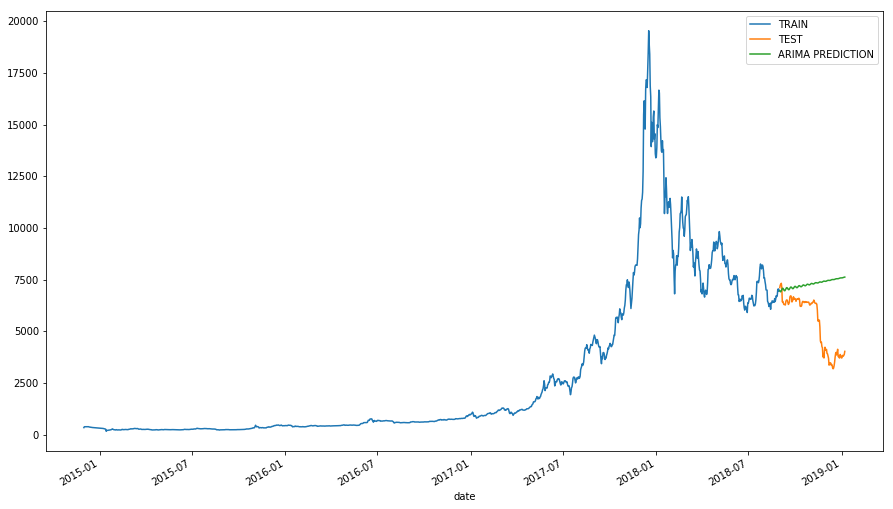

In [41]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(15,9))
ARIMA_predictions.plot(legend=True,label='ARIMA PREDICTION');

In [43]:
#Model evaluation

In [42]:
ARIMA_error = rmse(test, ARIMA_predictions)
print(ARIMA_error)

2386.870689446252


In [74]:
# ARIMA performs much better than exponential smoothing, but the margin of error is still too large. 8001 is almost half
# of the maximum value, so it might as well flip a coin. The huge spike in 2017-18 seems like an outlier that throws the
# model off, so I will resample by day instead of hour and log transform the time series to reduce the impact of the spike.

# Second modelling atempt, with the log of the time series this time

In [45]:
df_log = df['Close'].apply(lambda x: math.log(x))

In [95]:
#df_log = df_log.resample(rule='D').mean()

In [96]:
#df_log.dropna(inplace=True)

In [163]:
from numpy import log
df_log = log(df_log)

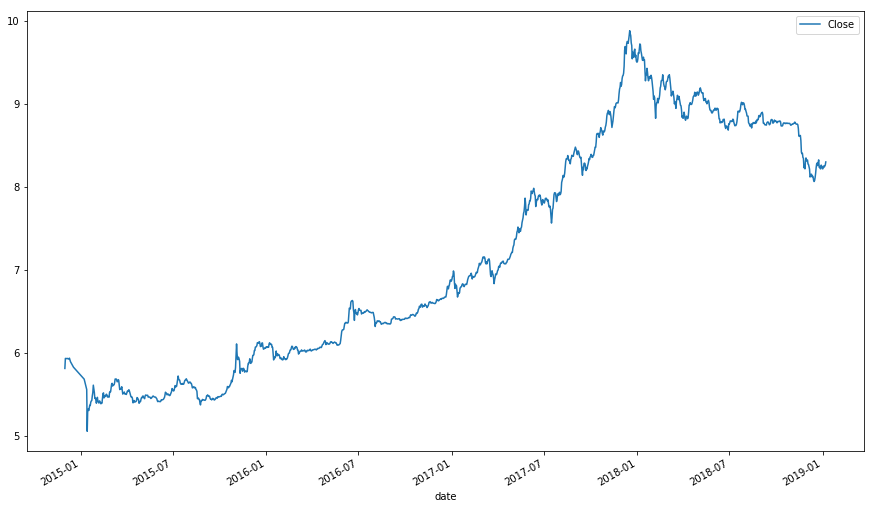

In [46]:
df_log.plot(legend=True,figsize=(15,9))

In [100]:
# This is a much less volatile time series, closer to linear growth than exponential. 2nd modelling attempt with
# exponential smoothing and ARIMA

In [48]:
df_log.iloc[1336]

8.868549361694699

In [47]:
train_log = df_log[:1336]
test_log = df_log[1336:]

In [49]:
len(df_log)

1465

In [50]:
fitted_DES_model_log = ExponentialSmoothing(train_log, trend='add').fit()
fitted_DES_predictions_log = fitted_DES_model_log.forecast(129)
fitted_DES_predictions_log.index = test_log.index

In [51]:
fitted_DES_predictions_log = fitted_DES_predictions_log.apply(lambda x: math.exp(x))

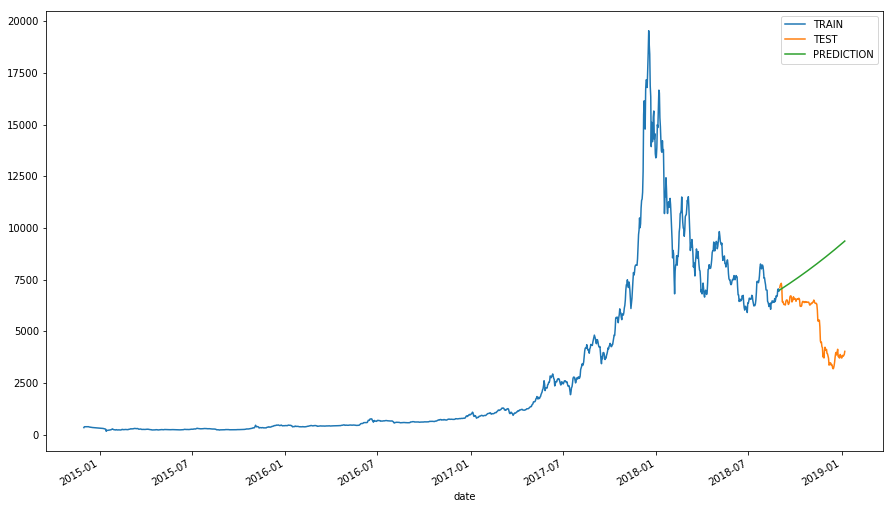

In [52]:
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(15,9))
fitted_DES_predictions_log.plot(legend=True,label='PREDICTION');

In [53]:
fitted_DES_error_log = rmse(test, fitted_DES_predictions_log)
print(fitted_DES_error_log)

3332.0687444582027


In [216]:
fitted_DES_predictions_log

date
2018-01-01     13490.718168
2018-01-02     13594.672825
2018-01-03     13699.428519
2018-01-04     13804.991423
2018-01-05     13911.367757
2018-01-06     14018.563789
2018-01-07     14126.585835
2018-01-08     14235.440261
2018-01-09     14345.133480
2018-01-10     14455.671956
2018-01-11     14567.062202
2018-01-12     14679.310781
2018-01-13     14792.424308
2018-01-14     14906.409447
2018-01-15     15021.272915
2018-01-16     15137.021480
2018-01-17     15253.661962
2018-01-18     15371.201234
2018-01-19     15489.646221
2018-01-20     15609.003904
2018-01-21     15729.281314
2018-01-22     15850.485538
2018-01-23     15972.623720
2018-01-24     16095.703054
2018-01-25     16219.730794
2018-01-26     16344.714247
2018-01-27     16470.660778
2018-01-28     16597.577809
2018-01-29     16725.472816
2018-01-30     16854.353337
                  ...      
2018-12-09    186276.136828
2018-12-10    187711.514218
2018-12-11    189157.952113
2018-12-12    190615.535742
2018-12-13    1

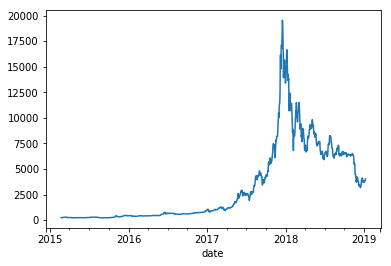

In [204]:
df['Close'].plot()

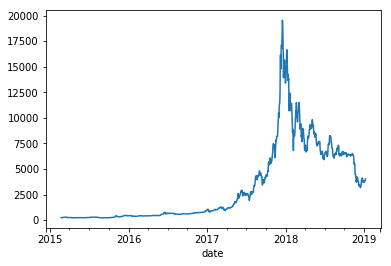

In [217]:
np.exp(np.log(df['Close'])).plot()

In [206]:
math.log(10000)

9.210340371976184

In [208]:
math.exp(math.log(10000))

10000.00000000001

In [219]:
fitted_DES_predictions_log

date
2018-01-01     9.509757
2018-01-02     9.517433
2018-01-03     9.525109
2018-01-04     9.532786
2018-01-05     9.540462
2018-01-06     9.548138
2018-01-07     9.555814
2018-01-08     9.563490
2018-01-09     9.571166
2018-01-10     9.578842
2018-01-11     9.586518
2018-01-12     9.594194
2018-01-13     9.601870
2018-01-14     9.609547
2018-01-15     9.617223
2018-01-16     9.624899
2018-01-17     9.632575
2018-01-18     9.640251
2018-01-19     9.647927
2018-01-20     9.655603
2018-01-21     9.663279
2018-01-22     9.670955
2018-01-23     9.678632
2018-01-24     9.686308
2018-01-25     9.693984
2018-01-26     9.701660
2018-01-27     9.709336
2018-01-28     9.717012
2018-01-29     9.724688
2018-01-30     9.732364
                ...    
2018-12-09    12.134985
2018-12-10    12.142662
2018-12-11    12.150338
2018-12-12    12.158014
2018-12-13    12.165690
2018-12-14    12.173366
2018-12-15    12.181042
2018-12-16    12.188718
2018-12-17    12.196394
2018-12-18    12.204070
2018-12-19 